<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleB_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.1 Interpolation Problem Statement

The interpolation function $\hat{y}(x)$ such that $\hat{y}(x_i) = y_i $ where i = 1,...,n is used when we want to estimulate the trend of the data. Given a new x*, we can use the interpolation function to interpolate its function value using $\hat{y}(x*)$.

Interpolation does not require the user to have an underlying model for the data.

# 17.2 Linear Interpolation

When using the linear interpolation to construct the module, the estimated point is assumed to lie on the line joining the nearest points to the left and right.

The linear interpolation at x is: $\hat{y}(x) = y_i+ \frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}$

Assume data x = [0, 1, 2, 4, 5], y = [1, 7, 5, 3, 6], the linear interpolation at x = 3 would be:  $\hat{y}(3) = y_i+ \frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)} = 5 + \frac{(3-5)(3-2)}{(4-2)} = 4$

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
x = [0, 1, 2, 4, 5]
y = [1, 7, 5, 3, 6]

f = interp1d(x, y) #set up the function
y_hat = f(3) #estimulate the number when x = 3
print(y_hat)

4.0


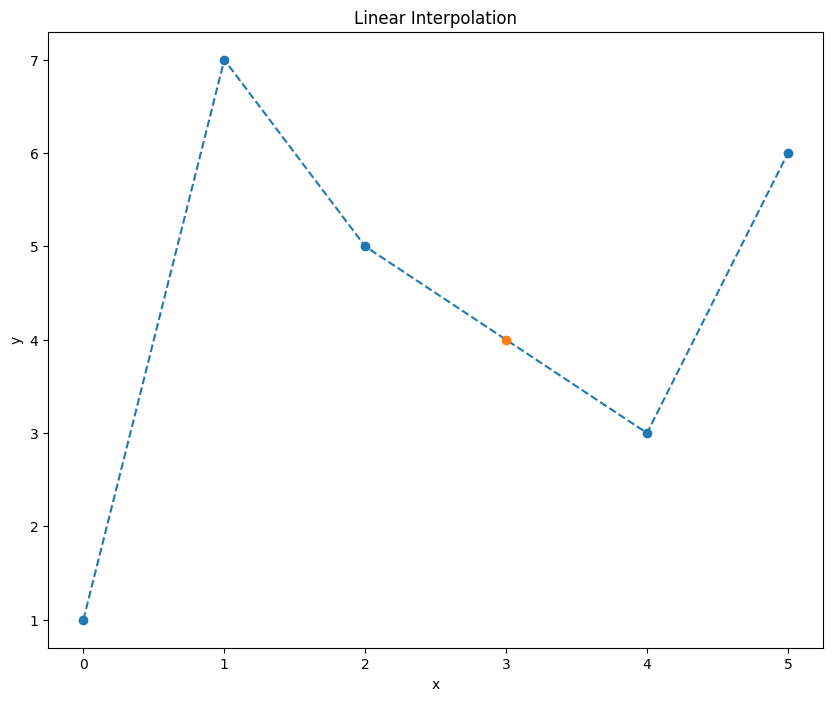

In [3]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '--o') #connect points with dashes
plt.plot(3, y_hat, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation')
plt.show()

# 17.3 Cubic Spline Interpolation

For cubic spline interpretation, we create cubic functions $S_i(x) = a_ix^3+b_ix^2+c_ix+d_i$ for x between $x_i$ and $x_{i+1}$ for i = 1,...,n-1, then joint them all to be the estamulated function f.

There are intotal of n points and n-1 cubic functiona, since we need to find a,b,c,d, there are totoal of 4(n-1) unknowns. To solve those unknowns, the equations needed are:

$S_i(x_i) = y_i$, i = 1,...,n-2

$S_i(x_{i+1} = y_{i+1})$, i = 1,...,n-2

$S'_i(x_{i+1})=S'_{i+1}(x_{i+1})$, i = 1,...,n-2

$S''_i(x_{i+1})=S''_{i+1}(x_{i+1})$, i = 1,...,n-2

$S''_1(x_1)=0$

$S''_{n-1}(x_n)=0$

In Python, we can use scipy's function CubicSpline to perform cubic spline interpolation.

In [4]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = [0, 1, 2, 3, 4, 5]
y = [2, 1, 5, 2, 7, 6]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 5, 100)
y_new = f(x_new)

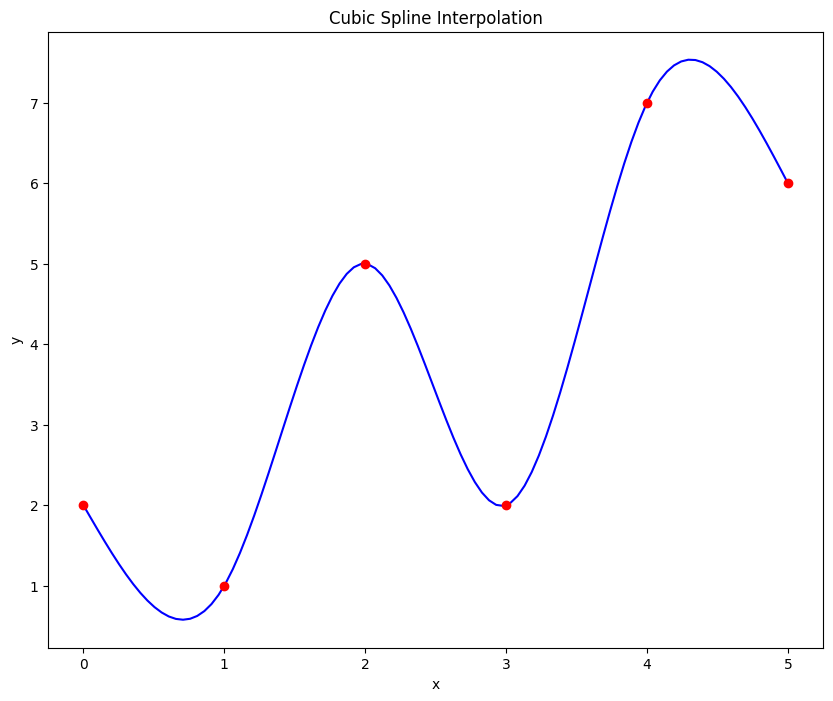

In [6]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

For easier calculation, let's calculate with three points:

In [7]:
x = [0, 1, 2]
y = [2, 1, 5]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_want = f(1.5)
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

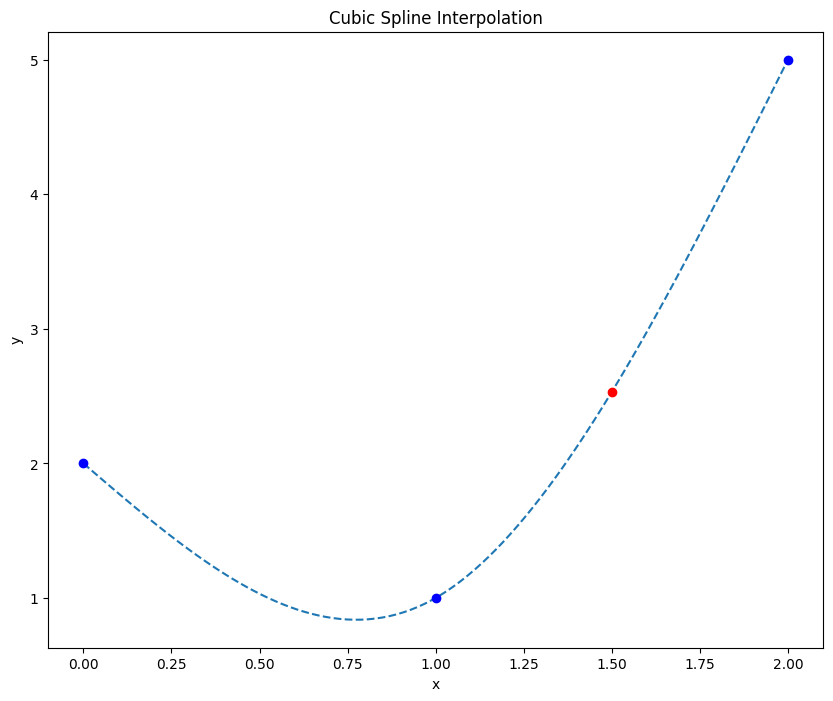

The estimate point at x = 1.5 is: 2.53125


In [8]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, '--')
plt.plot(x, y, 'bo')
plt.plot(1.5, x_want, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("The estimate point at x = 1.5 is:", x_want)

$a_1x_1^3+b_1x_1^2+c_1x_1+d_1 = y_1$

$a_1x_2^3+b_1x_2^2+c_1x_2+d_2 = y_2$

$a_2x_2^3+b_2x_2^2+c_2x_2+d_2 = y_2$

$a_2x_3^3+b_2x_3^2+c_2x_3+d_2 = y_3$

$3a_1x_2^2+2b_1x_2+c_1-3a_2x_2^2-2b_2x_2-c_2=0$

$6a_1x_2+2b_1-6a_2x_2-2b_2=0$

$6a_1x_1+2b_1=0$

$6a_2x_3+2b_2 = 0$

which $y_1 = 2, y_2 = 1, y_3 = 5$

Then, with the matrix form, we get:

In [9]:
b = np.array([2, 1, 1, 5, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])
np.dot(np.linalg.inv(A), b)

array([[ 1.25],
       [ 0.  ],
       [-2.25],
       [ 2.  ],
       [-1.25],
       [ 7.5 ],
       [-9.75],
       [ 4.5 ]])

Therefore, the two cubic polynomials are:

$S_1(x) = 1.25x^3-2.25x+2$

$S_2(x) = -1.25x^3+7.5x^2-9.75x+4.5$

In [10]:
S_2_1_5 = -1.25*1.5**3+7.5*1.5**2-9.75*1.5+4.5
print(S_2_1_5)

2.53125


Compare the point from the graph, the result is the same.